<a href="https://colab.research.google.com/github/laussin86/loan_default/blob/main/Loan_Default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             RocCurveDisplay,
                             precision_recall_curve,
                             average_precision_score,
                             roc_auc_score,
                             roc_curve,auc)


In [ ]:
#1. Check the datatypes of the attributes.
df = pd.read_csv("/content/drive/MyDrive/BCG/Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
#2. Are there any missing values in the dataset?
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [ ]:
df.shape

(255347, 18)

based on this descriptive information of the data, we can first see that the loannee has in average 43 years old with 82,500 as income. the majority of those people asked for loan approximately between 127,556 and 250,000. Aslo, the average credit score is 574 with the lowest of 300 and largest of 849. Those people had in average 2.5 credit line where the majority has 2 to 4 credit lines.

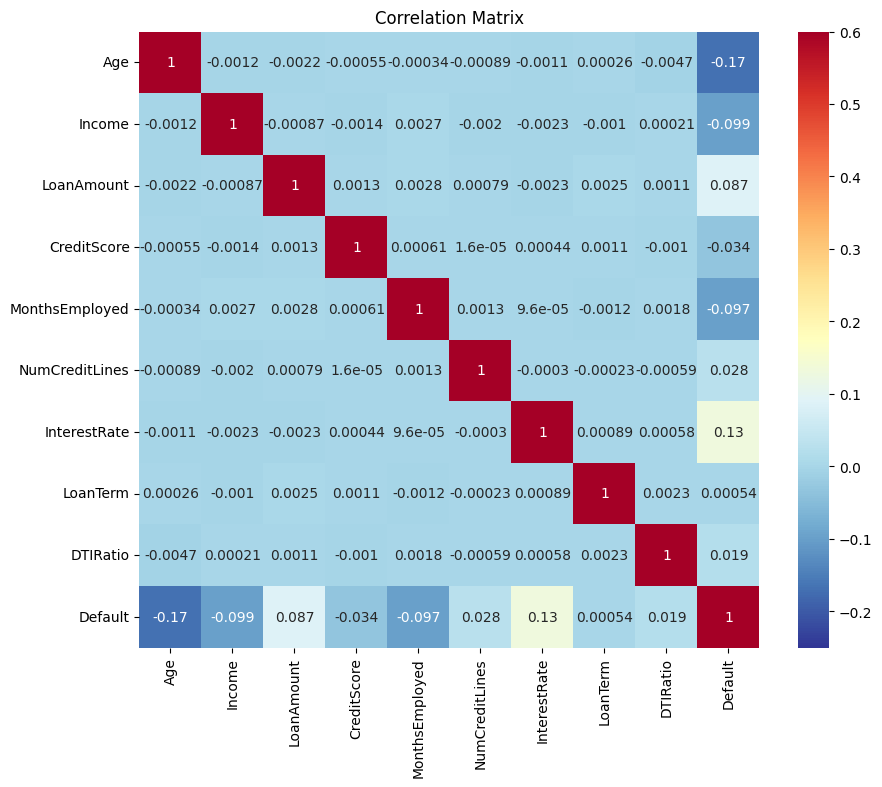

In [ ]:
# correlation matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
corrMatrix = numeric_df.corr()
sn.heatmap(corrMatrix, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot=True, vmax = 0.6)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Feature Engineering

df['LoanToIncomeRatio'] = df['LoanAmount']/df['Income']
df['FinancialRiskScore'] = df['CreditScore'] - df['LoanToIncomeRatio'] + (df['MonthsEmployed']/12)

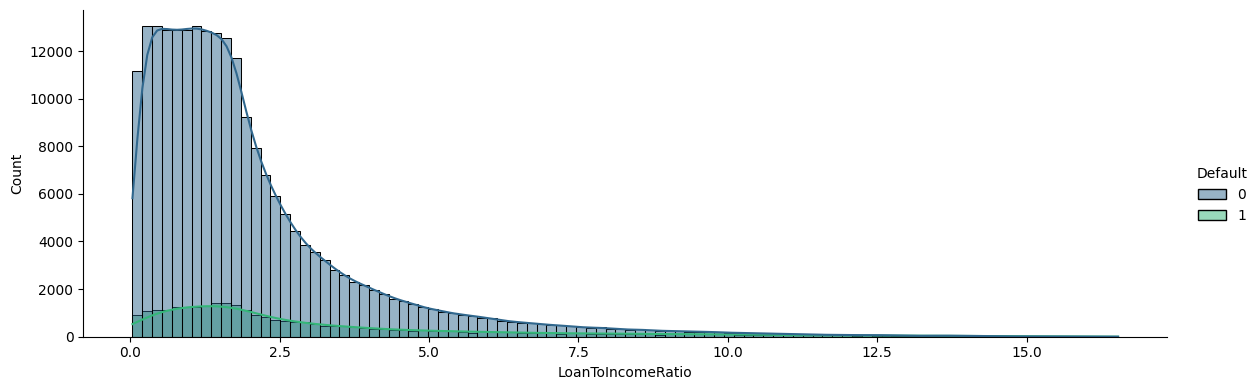

In [ ]:
sns.displot(data=df, x='LoanToIncomeRatio', hue='Default', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [ ]:
#let's check the means
df.groupby('Default')['LoanToIncomeRatio'].describe()
#the 2 means differ

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,2.036172,1.972648,0.033749,0.774130,1.495647,2.526627,16.46060
1,29653.0,3.253000,3.152142,0.033772,1.099627,2.049854,4.319043,16.53246


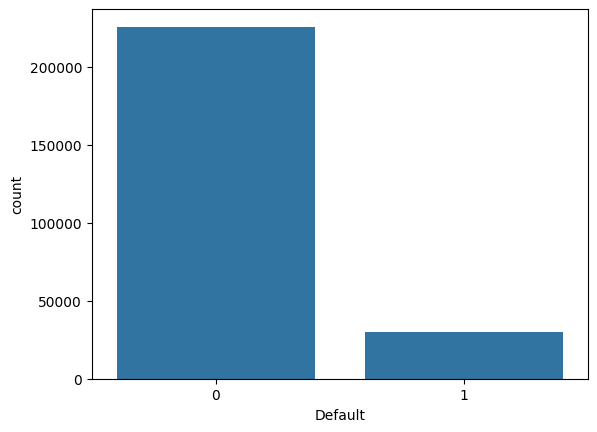

In [ ]:
#4. Graph the frequency of loan status with fully paid w/o current and charged off.
ax = sns.countplot(x="Default",data=df)



In [ ]:
#PREPROCESSING AND EXPLORATORY ANALYSIS

In [ ]:
len(df['Education'].unique())

4

(array([25613., 25411., 25466., 25532., 25727., 25480., 25466., 25646.,
        25439., 25567.]),
 array([ 15000. ,  28499.9,  41999.8,  55499.7,  68999.6,  82499.5,
         95999.4, 109499.3, 122999.2, 136499.1, 149999. ]),
 <BarContainer object of 10 artists>)

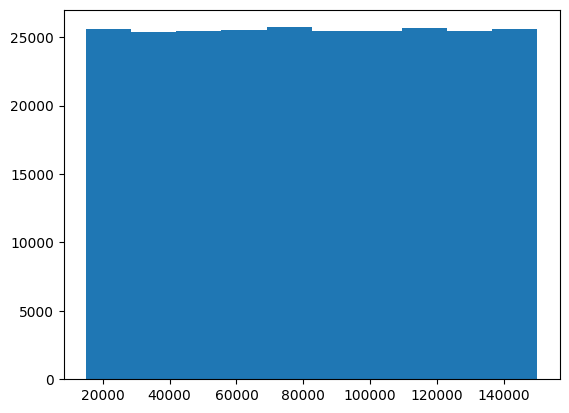

In [ ]:
#distribution of income
plt.hist(df['Income'])

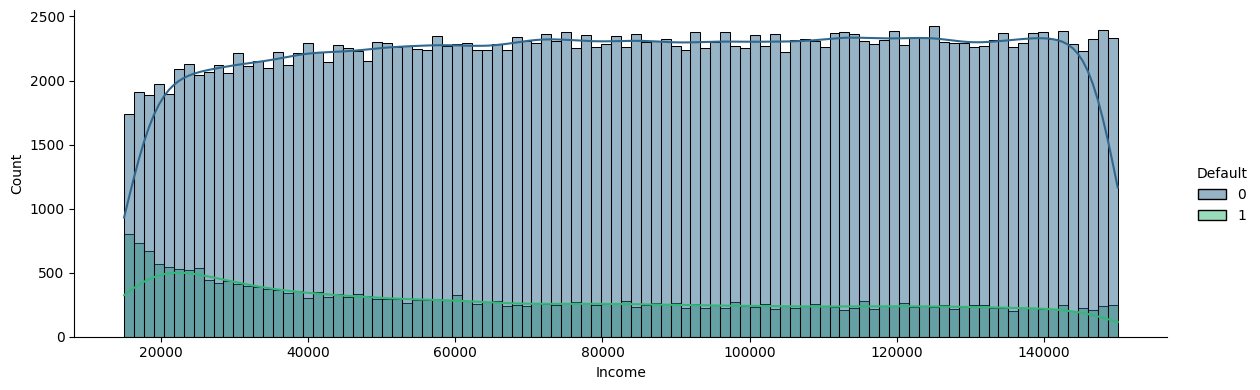

In [ ]:
# lets check the income of people who defaulted their loan vs did not.
sns.displot(data=df, x='Income', hue='Default', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [ ]:
#let's check the means
df.groupby('Default')['Income'].describe()
#the 2 means differ by around $12,054

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,83899.165995,38498.801232,15000.0,50994.0,84237.5,117186.75,149999.0
1,29653.0,71844.722659,40785.099507,15004.0,34022.0,66566.0,106895.00,149995.0


In [ ]:
df['NumCreditLines'].head()

0    4
1    1
2    3
3    3
4    4
Name: NumCreditLines, dtype: int64

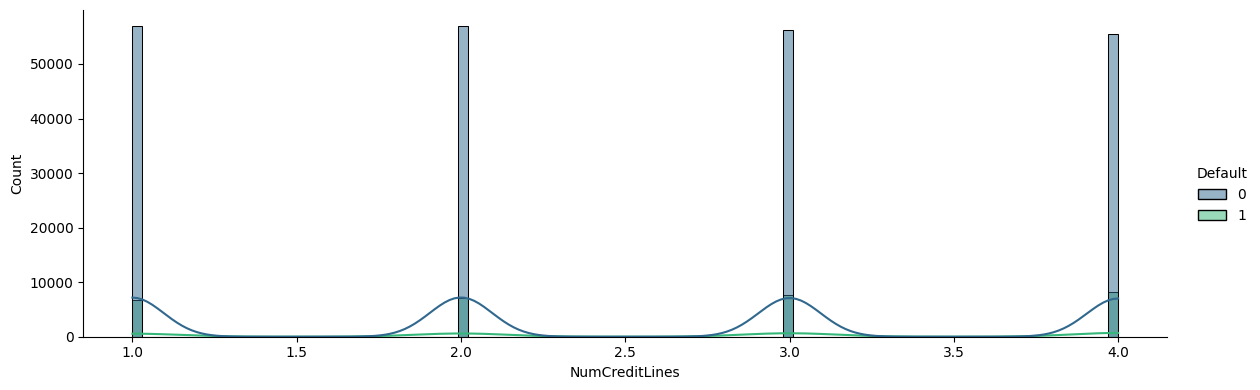

In [ ]:
sns.displot(data=df, x='NumCreditLines', hue='Default', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [ ]:
df.groupby('Default')['NumCreditLines'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,2.489566,1.116350,1.0,1.0,2.0,3.0,4.0
1,29653.0,2.588338,1.118258,1.0,2.0,3.0,4.0,4.0


In [ ]:
# we can see that there is no big difference between those  who defaulted and  those who did not so we drop it
df= df.drop('NumCreditLines', axis=1)

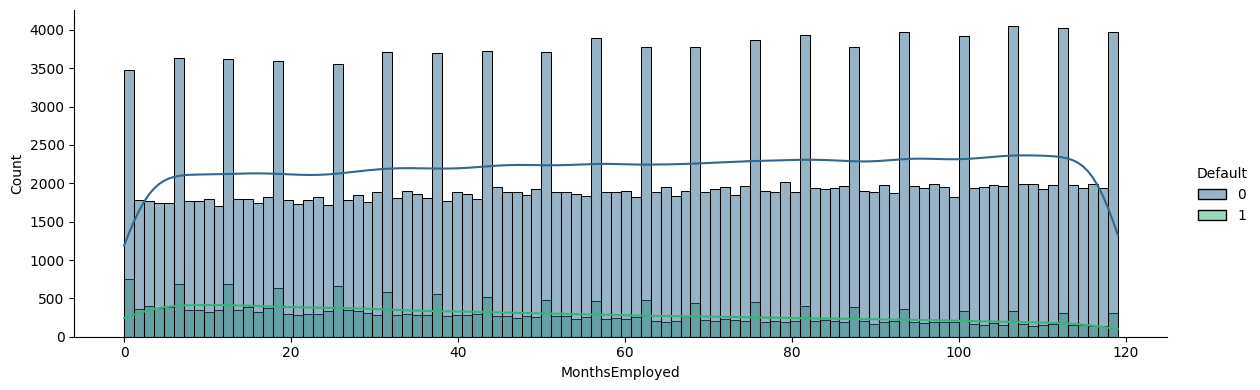

In [ ]:
#let's check the distribution of months of employment with default or not
sns.displot(data=df, x='MonthsEmployed',hue='Default', bins=100, height=4, aspect=3, kde=True, palette='viridis')


In [ ]:
from itertools import groupby
#let check % of people default  by month of employment
emp_default = df[df['Default']==1].groupby("MonthsEmployed").count()['Default']
emp_not_default = df[df['Default']==0].groupby("MonthsEmployed").count()['Default']
per_default = (emp_default * 100)/(emp_default + emp_not_default)
per_default

MonthsEmployed
0      18.143261
1      17.244656
2      16.968852
3      18.412552
4      17.774635
         ...    
115     7.149712
116     6.713615
117     6.957774
118     6.602914
119     7.986609
Name: Default, Length: 120, dtype: float64

 we noticed that the percentage is different based of month of employment so we keep it

In [ ]:
df['EmploymentType'].describe()
#few emplyment type so we keep it.

count        255347
unique            4
top       Part-time
freq          64161
Name: EmploymentType, dtype: object

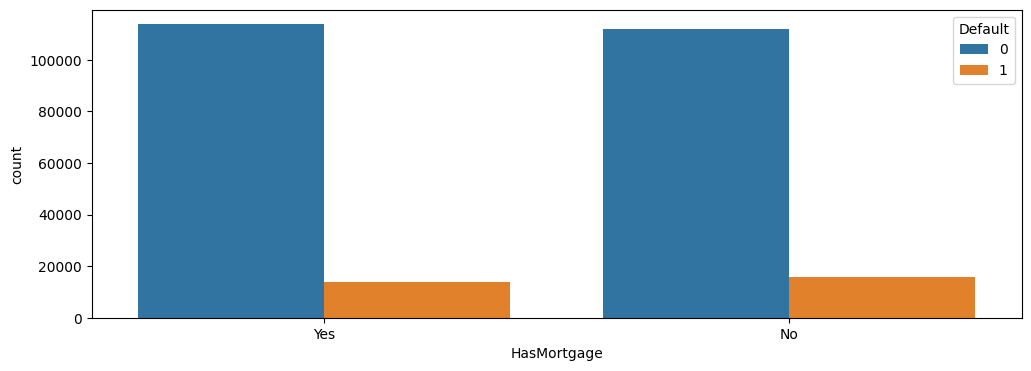

In [ ]:
#let's check distribution of home mortgage by loan status
plt.figure(figsize=(12,4))
ax = sns.countplot(x="HasMortgage",data=df,hue='Default')

In [ ]:
# let's check percentage of charged off
HasMortgage_default = df[df['Default']==1].groupby("HasMortgage").count()['Default']
HasMortgage_nodefault = df[df['Default']==0].groupby("HasMortgage").count()['Default']
perc_default = (HasMortgage_default * 100)/(HasMortgage_default + HasMortgage_nodefault)
perc_default

HasMortgage
No     12.345108
Yes    10.880581
Name: Default, dtype: float64

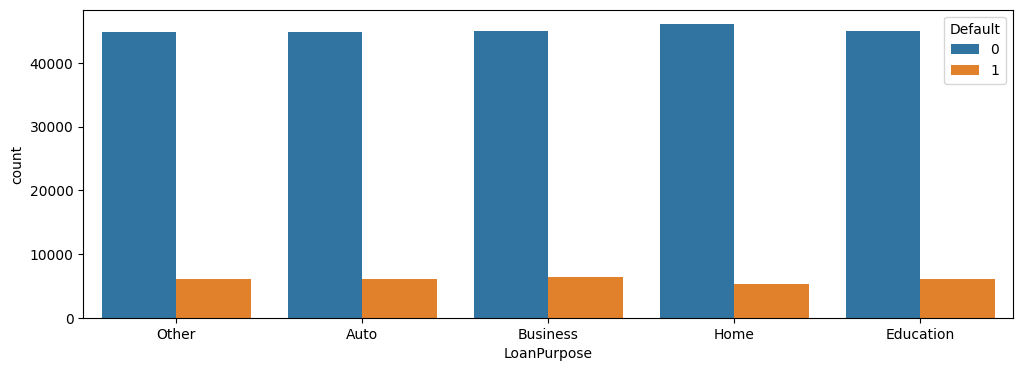

In [ ]:
#let's different categories for Loan purpose separated by loan status.
plt.figure(figsize=(12,4))
ax = sns.countplot(x="LoanPurpose",data=df,hue='Default')


In [ ]:
# let's check percentage of charged off
LoanPurpose_default = df[df['Default']==1].groupby("LoanPurpose").count()['Default']
LoanPurpose_nodefault = df[df['Default']==0].groupby("LoanPurpose").count()['Default']
perce_default = (LoanPurpose_default * 100)/(LoanPurpose_default + LoanPurpose_nodefault)
perce_default

LoanPurpose
Auto         11.881441
Business     12.326017
Education    11.838055
Home         10.234762
Other        11.788506
Name: Default, dtype: float64

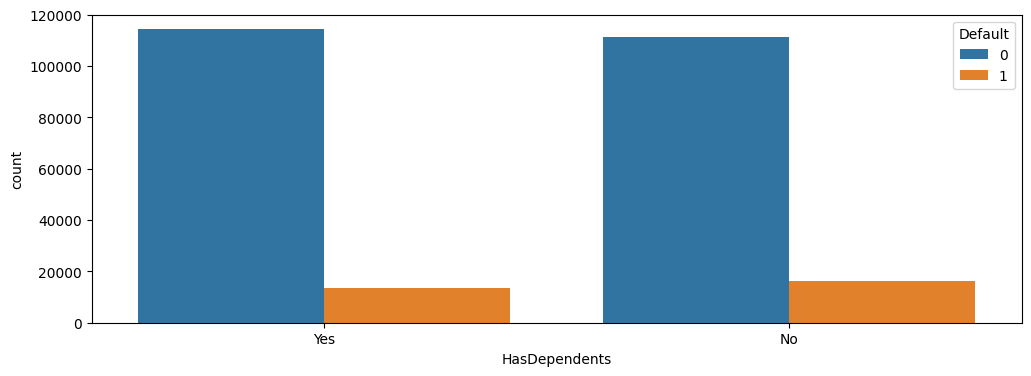

In [ ]:
#let's different categories for dependent status  separated by loan status.
plt.figure(figsize=(12,4))
ax = sns.countplot(x="HasDependents",data=df,hue='Default')

In [ ]:
HasDependents_Default = df[df['Default']==1].groupby("HasDependents").count()['Default']
HasDependents_noDefault = df[df['Default']==0].groupby("HasDependents").count()['Default']
percen_default = (HasDependents_Default * 100)/(HasDependents_Default + HasDependents_noDefault)
percen_default

HasDependents
No     12.724423
Yes    10.502419
Name: Default, dtype: float64

In [ ]:
df.groupby('Default')['InterestRate'].describe()
#clear difference between mean  charged off and fully paid so we keep it.

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,13.176994,6.612265,2.0,7.45,12.99,18.85,25.0
1,29653.0,15.896227,6.320304,2.0,11.06,16.93,21.36,25.0


In [ ]:
df.groupby('Default')['LoanAmount'].describe()
#clear difference between mean  charged off and fully paid so we keep it.

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,125353.656017,70708.101479,5001.0,63889.25,124236.0,186177.75,249999.0
1,29653.0,144515.311469,69547.822943,5000.0,88085.00,152672.0,205468.00,249993.0


In [ ]:
# Define bins for credit score groups
bins = [0, 600, 700, 750, 800, 850]
df['credit_score_group'] = pd.cut(df['CreditScore'], bins=bins)

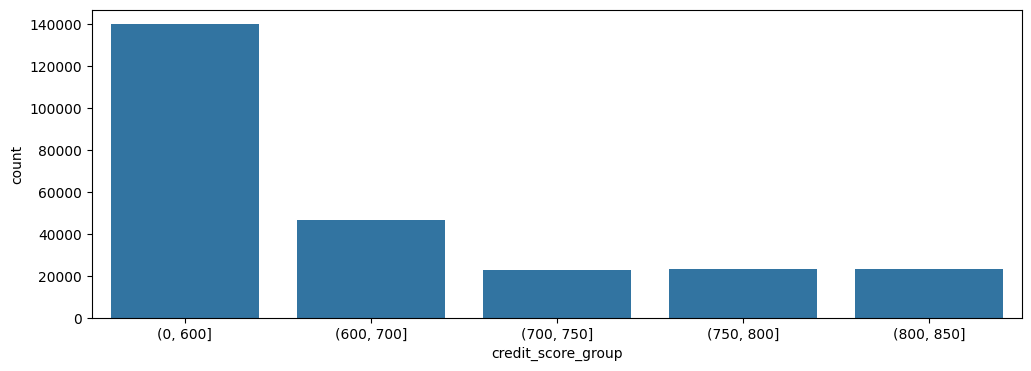

In [ ]:
# distribution for public records
plt.figure(figsize=(12,4))
ax = sns.countplot(x="credit_score_group",data=df)

In [ ]:
credit_score_group_Default = df[df['Default']==1].groupby("credit_score_group").count()['Default']
credit_score_group_noDefault = df[df['Default']==0].groupby("credit_score_group").count()['Default']
percent_default = (credit_score_group_Default * 100)/(credit_score_group_Default + credit_score_group_noDefault)
percent_default

credit_score_group
(0, 600]      12.450964
(600, 700]    11.172824
(700, 750]    10.489204
(750, 800]    10.305888
(800, 850]     9.830435
Name: Default, dtype: float64

In [ ]:
df= df.drop('CreditScore', axis=1)

In [ ]:
# Define bins for age groups
bins = [18, 30, 40, 50, 60, 70]
df['Age_Group'] = pd.cut(df['Age'], bins=bins)

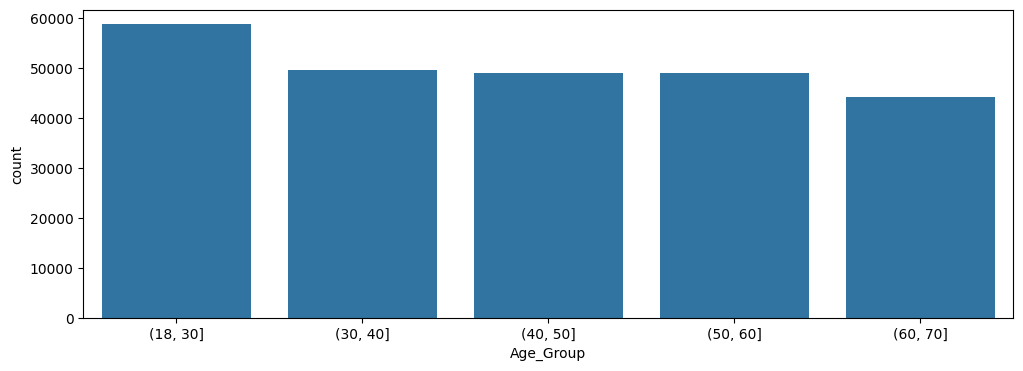

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="Age_Group",data=df)

In [ ]:
Age_Group_Default = df[df['Default']==1].groupby("Age_Group").count()['Default']
Age_Group_noDefault = df[df['Default']==0].groupby("Age_Group").count()['Default']
percenta_default = (Age_Group_Default * 100)/(Age_Group_Default + Age_Group_noDefault)
percenta_default

Age_Group
(18, 30]    19.152199
(30, 40]    13.772105
(40, 50]     9.895313
(50, 60]     6.973373
(60, 70]     5.054070
Name: Default, dtype: float64

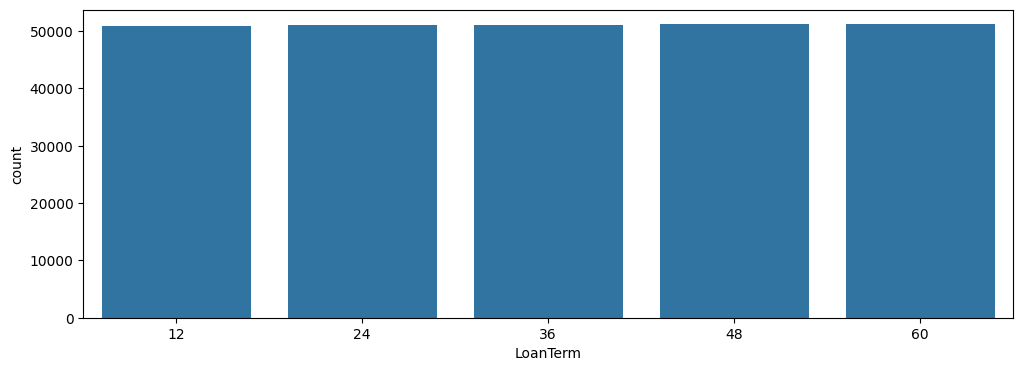

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="LoanTerm",data=df)

In [ ]:
LoanTerm_Default = df[df['Default']==1].groupby("LoanTerm").count()['Default']
LoanTerm_noDefault = df[df['Default']==0].groupby("LoanTerm").count()['Default']
percentag_default = (LoanTerm_Default * 100)/(LoanTerm_Default + LoanTerm_noDefault)
percentag_default

LoanTerm
12    11.617638
24    11.607755
36    11.568516
48    11.574092
60    11.696055
Name: Default, dtype: float64

In [ ]:
# no big difference so dropped it
df= df.drop('LoanTerm', axis=1)

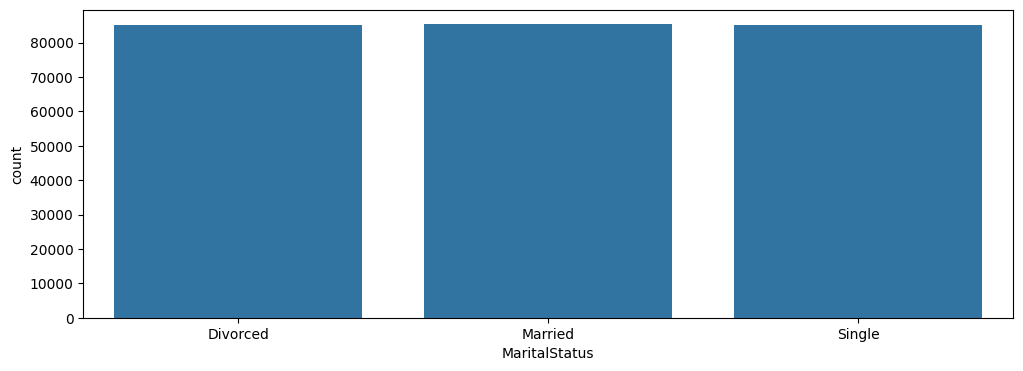

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="MaritalStatus",data=df)

In [ ]:
MaritalStatus_Default = df[df['Default']==1].groupby("MaritalStatus").count()['Default']
MaritalStatus_noDefault = df[df['Default']==0].groupby("MaritalStatus").count()['Default']
per_default = (MaritalStatus_Default * 100)/(MaritalStatus_Default + MaritalStatus_noDefault)
per_default

MaritalStatus
Divorced    12.532781
Married     10.397177
Single      11.912436
Name: Default, dtype: float64

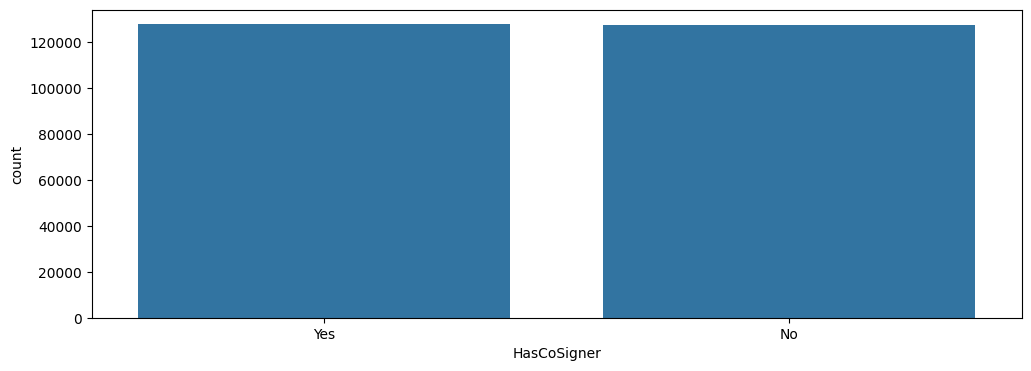

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="HasCoSigner",data=df)

In [ ]:
HasCoSigner_Default = df[df['Default']==1].groupby("HasCoSigner").count()['Default']
HasCoSigner_noDefault = df[df['Default']==0].groupby("HasCoSigner").count()['Default']
p_default = (HasCoSigner_Default * 100)/(HasCoSigner_Default + HasCoSigner_noDefault)
p_default

HasCoSigner
No     12.866051
Yes    10.360138
Name: Default, dtype: float64

In [ ]:
df['DTIRatio'].describe()

count    255347.000000
mean          0.500212
std           0.230917
min           0.100000
25%           0.300000
50%           0.500000
75%           0.700000
max           0.900000
Name: DTIRatio, dtype: float64

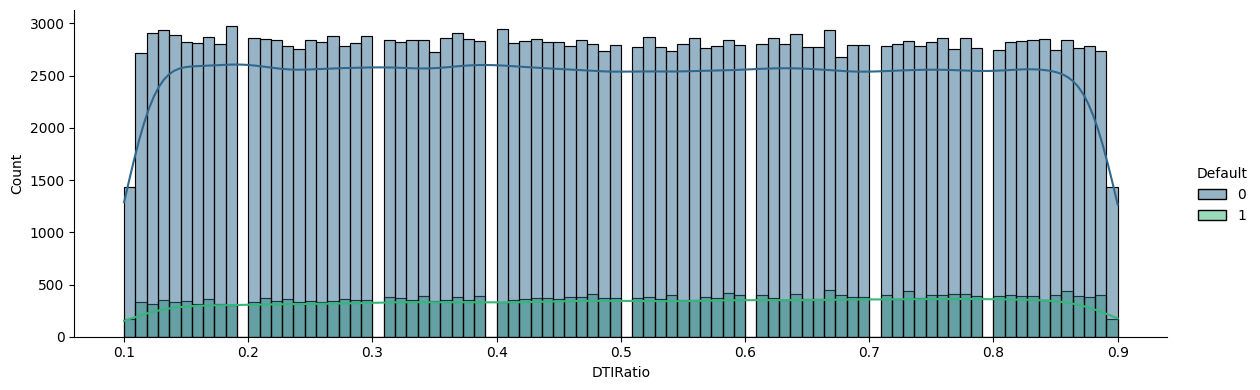

In [ ]:
sns.displot(data=df, x='DTIRatio', hue='Default', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [ ]:
df.groupby('Default')['DTIRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,0.498602,0.231099,0.1,0.30,0.50,0.70,0.9
1,29653.0,0.512467,0.229160,0.1,0.32,0.52,0.71,0.9


In [ ]:
#there is differences between means so we keep it.

In [ ]:
df= df.drop('LoanID', axis=1)

In [ ]:
data = df.sample(n=5000, random_state=42).copy()

In [ ]:
data.dtypes.value_counts()

object      7
int64       5
float64     4
category    1
category    1
Name: count, dtype: int64

In [ ]:
#SCALING AND TRAIN TEST SPLITING

In [ ]:
# lets first check the final dimension of our dataset after the preprocessing step
data.shape

(5000, 18)

In [ ]:
# let's now split our dataset

In [ ]:
X = data.drop('Default', axis=1)

In [ ]:
y = data['Default']

In [ ]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

In [ ]:
# keeping 30% for the test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3,random_state=42)

In [ ]:
# let's scale our train and test.
scaler = StandardScaler()


In [ ]:
#X_train.columns = X_train.columns.astype(str)
#X_train = pd.get_dummies(X_train)

X_train = scaler.fit_transform(X_train)


In [ ]:
#X_test.columns = X_test.columns.astype(str)
#X_test = pd.get_dummies(X_test)
X_test = scaler.transform(X_test)

# Feature Importances

In [ ]:
num_features = X_train.shape[1]  # Number of features
feature_indices = np.arange(num_features)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_indices, 'Importance': feature_importances})

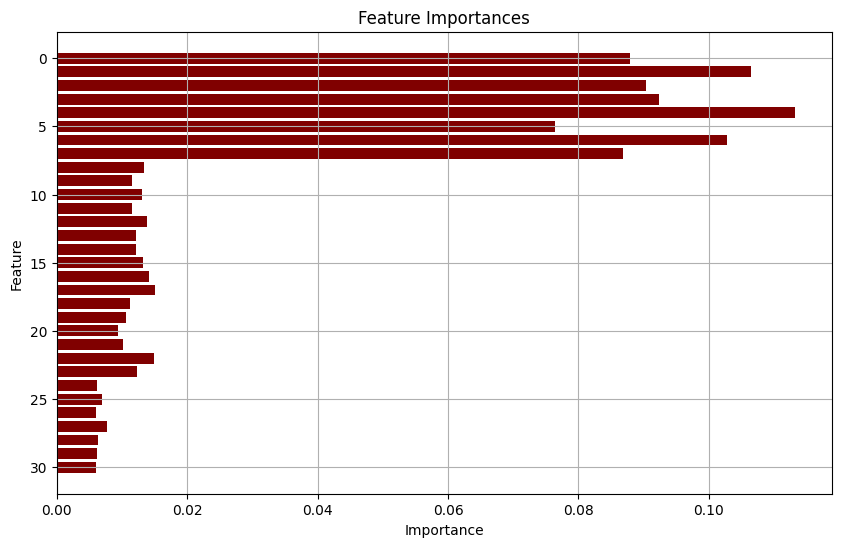

In [ ]:
# Plot feature importances

# Sort importance_df by Importance in descending order
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances in descending order
plt.figure(figsize=(10, 6))
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Importance'], color='maroon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [ ]:
print(y_train.shape)
print(X_train.shape)

(3500,)
(3500, 31)


In [ ]:
parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBClassifier(random_state=3),
                         parameter_space, cv=5, n_jobs=4,
                         scoring="accuracy",
                         random_state=3, n_iter=10)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters:
{'subsample': 0.3, 'reg_lambda': 3, 'reg_alpha': 33, 'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.009, 'gamma': 7, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5, 'booster': 'gbtree'}


In [ ]:
model = XGBClassifier(**clf.best_params_)

In [ ]:
#XGBoost
#let's first fit the model to the train data
xgb_model= model.fit(X_train, y_train)

In [ ]:
# now let's create the prediciton
preds = xgb_model.predict(X_test)

In [ ]:
# The confusion Matrix
confusion_matrix(y_test,preds)

array([[1337,    0],
       [ 163,    0]])

In [ ]:
#let's see now the metrics based on XGBoost
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1337
           1       0.00      0.00      0.00       163

    accuracy                           0.89      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.79      0.89      0.84      1500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Get the best Decision Tree classifier with optimal parameters
best_dt_classifier = grid_search_dt.best_estimator_

# Predict on the test set and evaluate performance
y_pred_dt = best_dt_classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_dt)

array([[851,  48],
       [ 96,   5]])

In [ ]:
#let's see now the metrics based on Decision tree
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       899
           1       0.09      0.05      0.06       101

    accuracy                           0.86      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.82      0.86      0.84      1000



In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best Random Forest classifier with optimal parameters
best_rf_classifier = grid_search_rf.best_estimator_

# Predict on the test set and evaluate performance
y_pred_rf = best_rf_classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_rf)

array([[896,   2],
       [ 96,   6]])

In [ ]:
#let's see now the metrics based on Random Forest
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       898
           1       0.75      0.06      0.11       102

    accuracy                           0.90      1000
   macro avg       0.83      0.53      0.53      1000
weighted avg       0.89      0.90      0.86      1000



In [ ]:
# Logistic Regression
log_reg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV to find the best parameters
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid_logreg, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train, y_train)

# Get the best Logistic Regression model with optimal parameters
best_log_reg = grid_search_logreg.best_estimator_

# Evaluate the best model on the test set
y_pred_logreg = best_log_reg.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_logreg)

array([[894,   5],
       [ 92,   9]])

In [ ]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       899
           1       0.64      0.09      0.16       101

    accuracy                           0.90      1000
   macro avg       0.77      0.54      0.55      1000
weighted avg       0.88      0.90      0.87      1000



In [ ]:
# let's test the models with balancing loan status
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 393
Before OverSampling, counts of label '0': 3107 



In [ ]:
sm = SMOTE(random_state = 2)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_resample.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resample.shape))

After OverSampling, the shape of train_X: (6214, 31)
After OverSampling, the shape of train_y: (6214,) 



In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resample == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resample == 0)))

After OverSampling, counts of label '1': 3107
After OverSampling, counts of label '0': 3107


In [ ]:
# Logistic Regression
log_reg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV to find the best parameters
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid_logreg, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train_resample, y_train_resample)

# Get the best Logistic Regression model with optimal parameters
best_log_reg = grid_search_logreg.best_estimator_

# Evaluate the best model on the test set
y_pred_logreg = best_log_reg.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_logreg )

array([[933, 404],
       [ 51, 112]])

In [ ]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.95      0.70      0.80      1337
           1       0.22      0.69      0.33       163

    accuracy                           0.70      1500
   macro avg       0.58      0.69      0.57      1500
weighted avg       0.87      0.70      0.75      1500



In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_resample, y_train_resample)

# Get the best Random Forest classifier with optimal parameters
best_rf_classifier = grid_search_rf.best_estimator_

# Predict on the test set and evaluate performance
y_pred_rf = best_rf_classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_rf)

array([[1295,   42],
       [ 142,   21]])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1337
           1       0.33      0.13      0.19       163

    accuracy                           0.88      1500
   macro avg       0.62      0.55      0.56      1500
weighted avg       0.84      0.88      0.85      1500



In [ ]:
parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBClassifier(random_state=3),
                         parameter_space, cv=5, n_jobs=4,
                         scoring="accuracy",
                         random_state=3, n_iter=10)

clf.fit(X_train_resample, y_train_resample)
print("Best parameters:")
print(clf.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters:
{'subsample': 0.6, 'reg_lambda': 3, 'reg_alpha': 10, 'n_estimators': 2500, 'max_depth': 6, 'learning_rate': 0.005, 'gamma': 7, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7, 'booster': 'gbtree'}


In [ ]:
#XGBoost
model = XGBClassifier(**clf.best_params_)
model.fit(X_train_resample, y_train_resample)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = model.predict(X_test)

In [ ]:
confusion_matrix(y_test,preds)

array([[1256,   81],
       [ 126,   37]])

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1337
           1       0.31      0.23      0.26       163

    accuracy                           0.86      1500
   macro avg       0.61      0.58      0.59      1500
weighted avg       0.84      0.86      0.85      1500



In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)
# Define the k-NN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_resample, y_train_resample)

# Get the best k-NN classifier with optimal parameters
best_knn_classifier = grid_search_knn.best_estimator_
# Predict on the test set and evaluate performance
y_pred_knn = best_knn_classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_knn)

array([[1100,  237],
       [ 115,   48]])

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1337
           1       0.17      0.29      0.21       163

    accuracy                           0.77      1500
   macro avg       0.54      0.56      0.54      1500
weighted avg       0.83      0.77      0.79      1500



In [ ]:
from sklearn.naive_bayes import GaussianNB
# Define the Naive Bayes (GaussianNB) classifier
nb_classifier = GaussianNB()

# No hyperparameter tuning for Naive Bayes, use default settings

# Train the classifier on the resampled training data
nb_classifier.fit(X_train_resample, y_train_resample)

# Predict on the test set and evaluate performance
y_pred_nb = nb_classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_nb)

array([[867, 470],
       [ 54, 109]])

In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       891
           1       0.21      0.71      0.33       109

    accuracy                           0.68      1000
   macro avg       0.58      0.69      0.56      1000
weighted avg       0.87      0.68      0.74      1000



In [ ]:
#calculate AUC of model Xgboost
auc = metrics.roc_auc_score(y_test, preds)

In [ ]:
print(auc)

0.5832052346843726


In [ ]:
#calculate AUC of model Random Forest
auc = metrics.roc_auc_score(y_test, y_pred_rf)
print(auc)

0.5487103716313878


In [ ]:
#calculate AUC of model logistic regression
auc = metrics.roc_auc_score(y_test, y_pred_logreg)
print(auc)

0.6924737646319248


In [ ]:
#calculate AUC of model Naive Bayes (GaussianNB) classifier
auc = metrics.roc_auc_score(y_test, y_pred_nb)
print(auc)

0.6585891864856308


In [ ]:
#calculate AUC of model k-NN classifier
auc = metrics.roc_auc_score(y_test, y_pred_knn)
print(auc)


0.5586079997797468


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:


import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_resample.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
hist=model.fit(X_train_resample, y_train_resample, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/10
175/175 [==============================] - 2s 7ms/step - loss: 0.6096 - accuracy: 0.6583 - val_loss: 0.5997 - val_accuracy: 0.6865
Epoch 2/10
175/175 [==============================] - 1s 5ms/step - loss: 0.5122 - accuracy: 0.7437 - val_loss: 0.4876 - val_accuracy: 0.7958
Epoch 3/10
175/175 [==============================] - 1s 5ms/step - loss: 0.4655 - accuracy: 0.7795 - val_loss: 0.4945 - val_accuracy: 0.8006
Epoch 4/10
175/175 [==============================] - 1s 4ms/step - loss: 0.4183 - accuracy: 0.8138 - val_loss: 0.4281 - val_accuracy: 0.8441
Epoch 5/10
175/175 [==============================] - 1s 3ms/step - loss: 0.3759 - accuracy: 0.8425 - val_loss: 0.5240 - val_accuracy: 0.7717
Epoch 6/10
175/175 [==============================] - 1s 4ms/step - loss: 0.3378 - accuracy: 0.8698 - val_loss: 0.3313 - val_accuracy: 0.8939
Epoch 7/10
175/175 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8839 - val_loss: 0.2757 - val_accuracy: 0.9196
Epoch 

In [ ]:
def get_training_metrics(history):

  # This is needed depending on if you used the pretrained model or you trained it yourself
  if not isinstance(history, pd.core.frame.DataFrame):
    history = history.history

  loss = history['loss']
  val_loss = history['val_loss']

  return  loss, val_loss

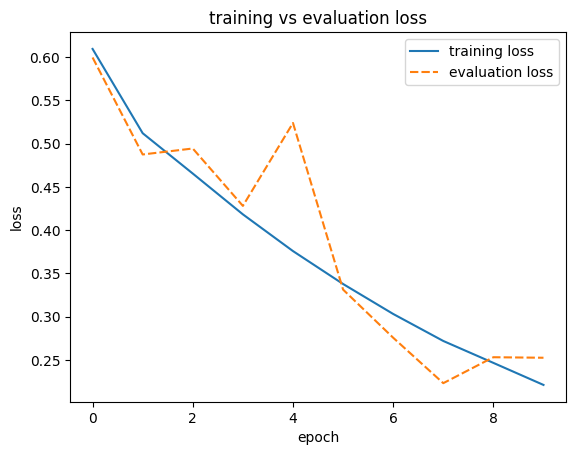

In [ ]:
loss, val_loss = get_training_metrics(hist)
loss_plot = pd.DataFrame({"training loss":loss, "evaluation loss":val_loss})
loss_plot = sns.lineplot(data=loss_plot)
loss_plot.set_title('training vs evaluation loss')
loss_plot.set_xlabel('epoch')
loss_plot.set_ylabel('loss')
plt.show()


47/47 [==============================] - 0s 1ms/step


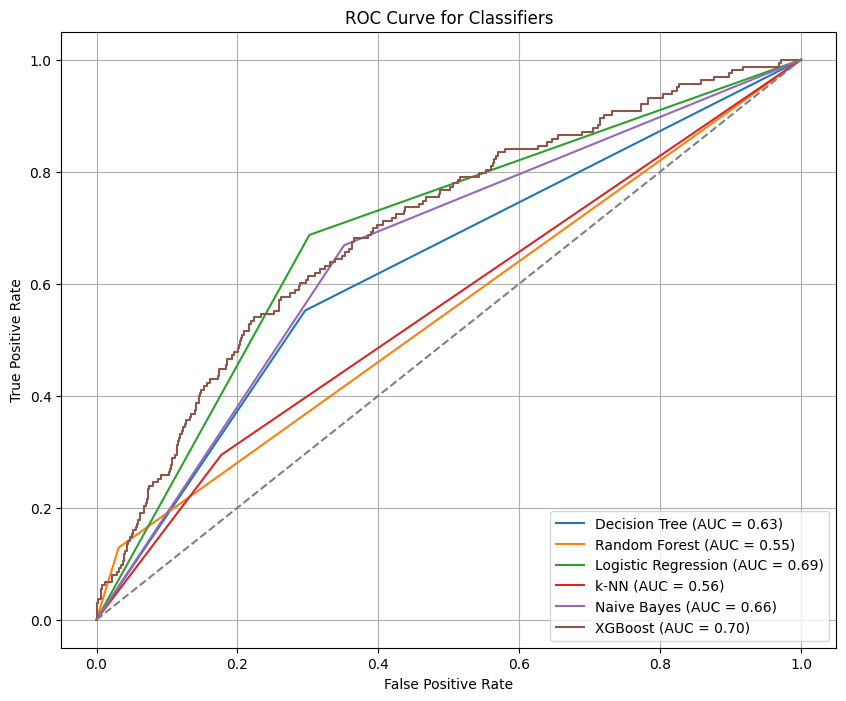

In [ ]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Random Forest': best_rf_classifier,
    'Logistic Regression': best_log_reg,
    'k-NN': best_knn_classifier,
    'Naive Bayes': nb_classifier,
    'XGBoost': model
}

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its ROC curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict(X_test)
    # Extract probabilities for the positive class
    if len(y_prob.shape) > 1 and y_prob.shape[1] > 1:
        y_prob_positive = y_prob[:, 1]  # If probabilities for each class are available
    else:
        y_prob_positive = y_prob
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob_positive)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot ROC curve for each classifier
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal (random guess line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

47/47 [==============================] - 0s 1ms/step


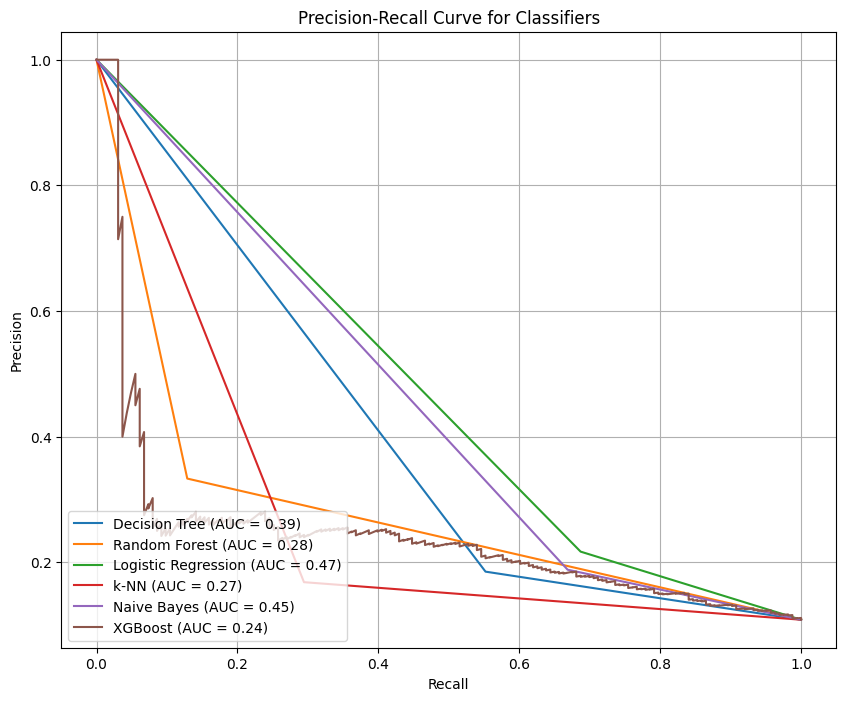

In [ ]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Random Forest': best_rf_classifier,
    'Logistic Regression': best_log_reg,
    'k-NN': best_knn_classifier,
    'Naive Bayes': nb_classifier,
    'XGBoost': model
}

# Create a figure for PR curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its PR curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict(X_test)
    # Extract probabilities for the positive class
    if len(y_prob.shape) > 1 and y_prob.shape[1] > 1:
        y_prob_positive = y_prob[:, 1]  # If probabilities for each class are available
    else:
        y_prob_positive = y_prob

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob_positive)

    # Calculate PR AUC score
    pr_auc = auc(recall, precision)

    # Plot PR curve for each classifier
    plt.plot(recall, precision, label=f'{clf_name} (AUC = {pr_auc:.2f})')

# Add labels and title to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classifiers')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()